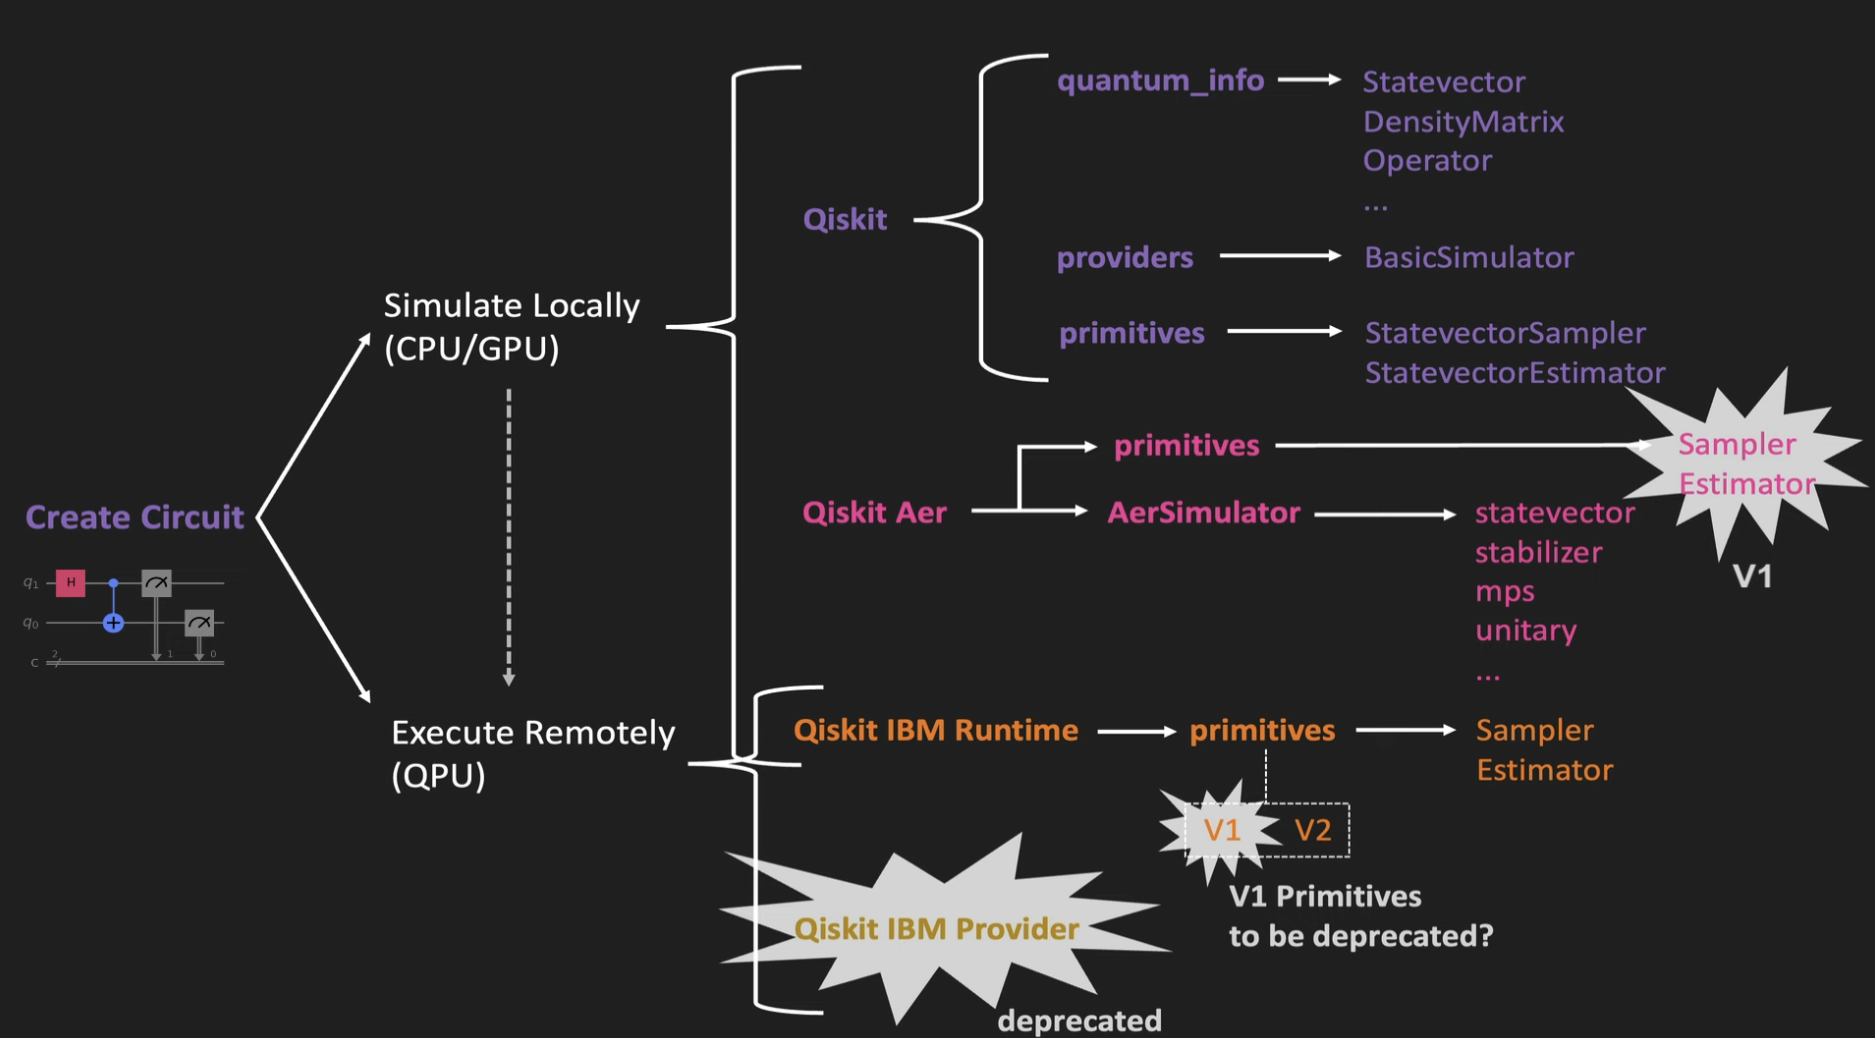

### Quantum Info Module

In [1]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

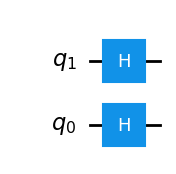

In [2]:
qc = QuantumCircuit(2)
qc.h([1,0])
qc.draw()

In [4]:
psi = qi.Statevector(qc)
psi

<IPython.core.display.Latex object>

In [5]:
probs = psi.probabilities()
probs

array([0.25, 0.25, 0.25, 0.25])

In [6]:
counts = psi.sample_counts(shots=1024)
counts

{'00': 257, '01': 270, '10': 244, '11': 253}

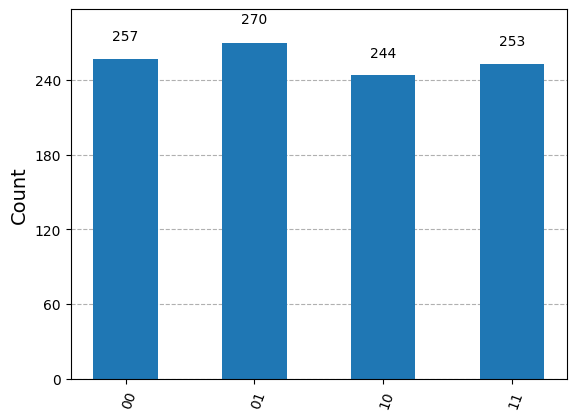

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [9]:
samples = psi.sample_memory(shots=10)
samples

array(['11', '01', '01', '10', '01', '11', '00', '11', '11', '11'],
      dtype='<U42')

In [11]:
o = qi.SparsePauliOp(['ZZ', 'XX', 'II'], [0.2,-0.3,0.4])
o.to_operator()

Operator([[ 0.6+0.j,  0. +0.j,  0. +0.j, -0.3+0.j],
          [ 0. +0.j,  0.2+0.j, -0.3+0.j,  0. +0.j],
          [ 0. +0.j, -0.3+0.j,  0.2+0.j,  0. +0.j],
          [-0.3+0.j,  0. +0.j,  0. +0.j,  0.6+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [12]:
o_evs = psi.expectation_value(o)
o_evs

(0.10000000000000003+0j)

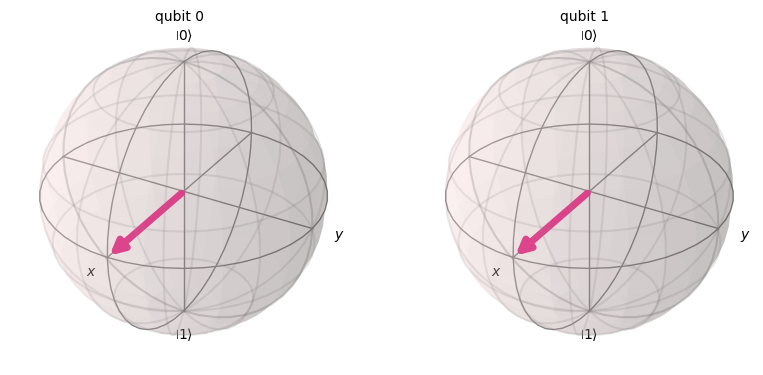

In [13]:
psi.draw('bloch')

In [15]:
rho = qi.DensityMatrix(qc)
rho

<IPython.core.display.Latex object>

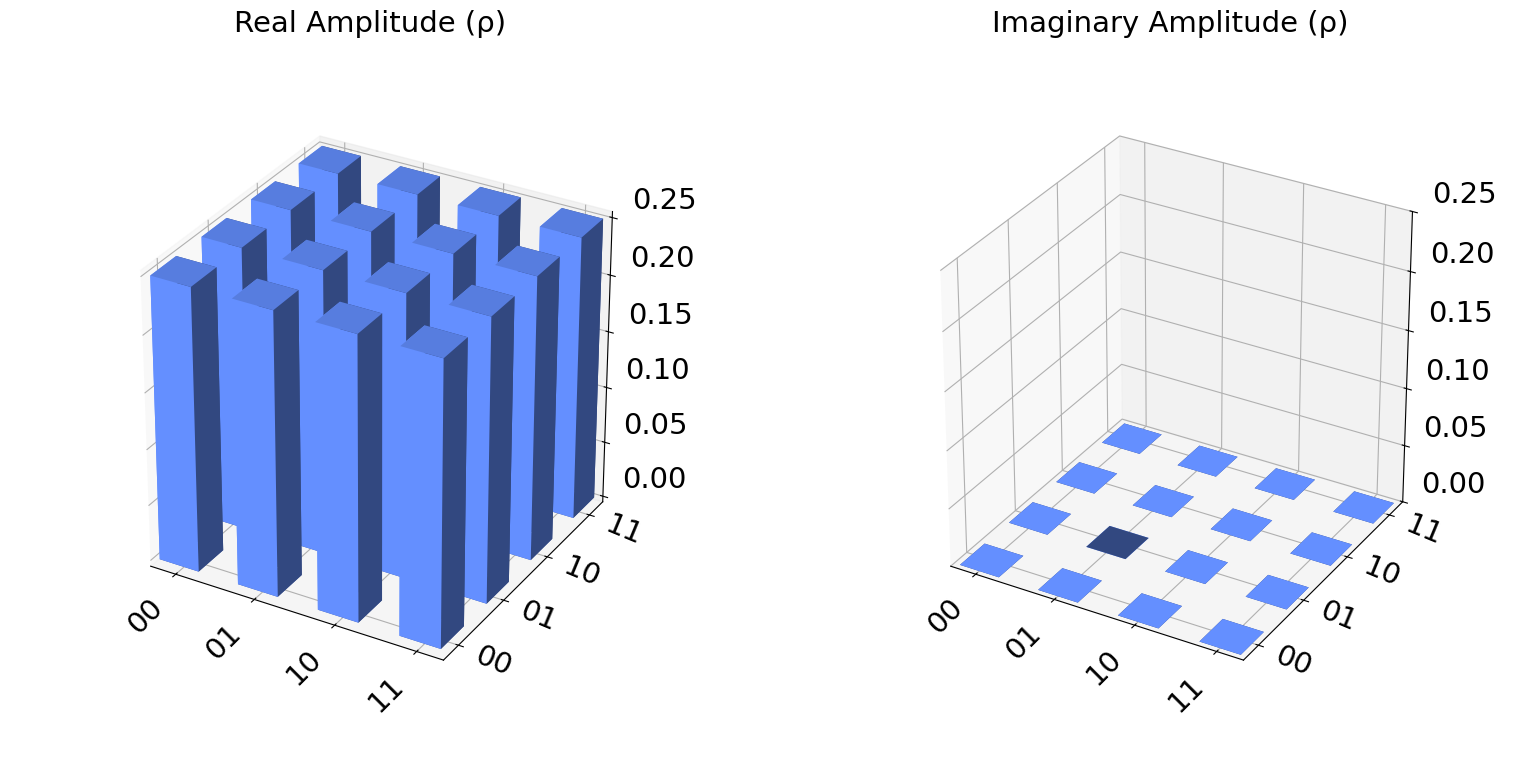

In [17]:
rho.draw('city')

In [19]:
rho_1 = qi.partial_trace(rho, [0])
rho_1

<IPython.core.display.Latex object>

In [20]:
unitary = qi.Operator(qc)
unitary

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


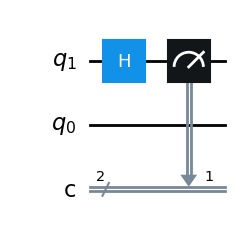

In [21]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.draw()

what if we use the measurement results for  other operation in the circuit

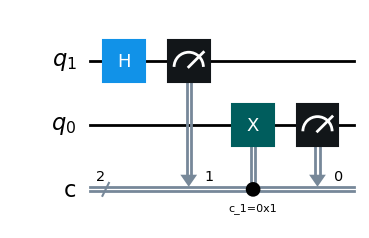

In [23]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.x(0).c_if(1,1)
qc.measure(0,0)
qc.draw()

In [24]:
qi.Statevector(qc)

QiskitError: 'Cannot apply instruction with classical bits: measure'

we can't use the statevector class on circuit that has measurement